In [ ]:
#Inferencia Estadística - PCA
#Alumnos: Cardozo Rodrigo, Larregle Matias, Levy Lara y Tarizzo Facundo

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Cargar base de datos a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = "/content/drive/MyDrive/calidadvino.csv"


datos = pd.read_csv(url)

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   Tartaric Acid         1599 non-null   float64
 2   Grape Density         1599 non-null   float64
 3   Citric Acid           1599 non-null   float64
 4   Residual.sugar        1599 non-null   float64
 5   Sodium chloride       1599 non-null   float64
 6   Free.sulfur.dioxide   1599 non-null   float64
 7   Bound.sulfur.dioxide  1599 non-null   float64
 8   Alcohol Density       1599 non-null   float64
 9   PH Levels             1599 non-null   float64
 10  Potassium chloride    1599 non-null   float64
 11  Alcohol Content       1599 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Eliminar la columna "Unnamed"
datos.dropna(inplace=True)
datos = datos.loc[:, ~datos.columns.str.contains('Unnamed: 0')]
datos

,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


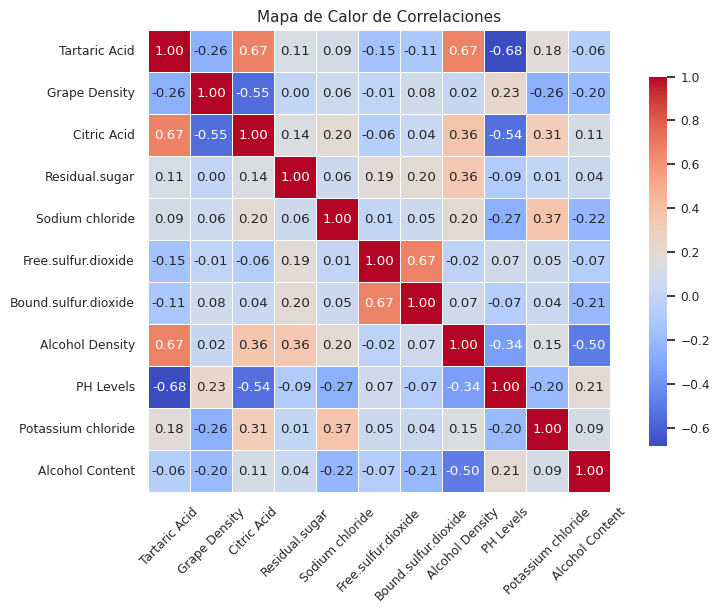

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = datos.corr()

# Crear un mapa de calor tipo cuadriculado para la correlación
plt.figure(figsize=(10, 6))
sns.set(font_scale=0.8)  # Aumentar tamaño de fuente
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
                      square=True, cbar_kws={"shrink": .8},
                      linewidths=0.5)  # Cuadrícula
plt.title('Mapa de Calor de Correlaciones', fontsize=11)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


,0
Tartaric Acid,8.319637
Grape Density,0.527821
Citric Acid,0.270976
Residual.sugar,2.538806
Sodium chloride,0.087467
Free.sulfur.dioxide,15.874922
Bound.sulfur.dioxide,46.467792
Alcohol Density,0.996747
PH Levels,3.311113
Potassium chloride,0.658149


In [ ]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


,0
Tartaric Acid,3.031416
Grape Density,0.032062
Citric Acid,0.037947
Residual.sugar,1.987897
Sodium chloride,0.002215
Free.sulfur.dioxide,109.414884
Bound.sulfur.dioxide,1082.102373
Alcohol Density,0.000004
PH Levels,0.023835
Potassium chloride,0.028733


In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']
)

,Tartaric Acid,Grape Density,Citric Acid,Residual.sugar,Sodium chloride,Free.sulfur.dioxide,Bound.sulfur.dioxide,Alcohol Density,PH Levels,Potassium chloride,Alcohol Content
PC1,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
PC2,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
PC3,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
PC4,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
PC5,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
PC6,-0.101479,-0.411449,-0.069593,-0.049156,-0.304339,0.014000,-0.136308,0.391152,0.522116,0.381263,-0.361645
PC7,0.350227,0.533735,-0.105497,-0.290663,-0.370413,0.116596,0.093662,0.170481,0.025138,0.447469,0.327651
PC8,0.177595,0.078775,0.377516,-0.299845,0.357009,0.204781,-0.019036,0.239223,0.561391,-0.374604,0.217626
PC9,0.194021,-0.129110,-0.381450,0.007523,0.111339,0.635405,-0.592116,0.020719,-0.167746,-0.058367,0.037603
PC10,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015


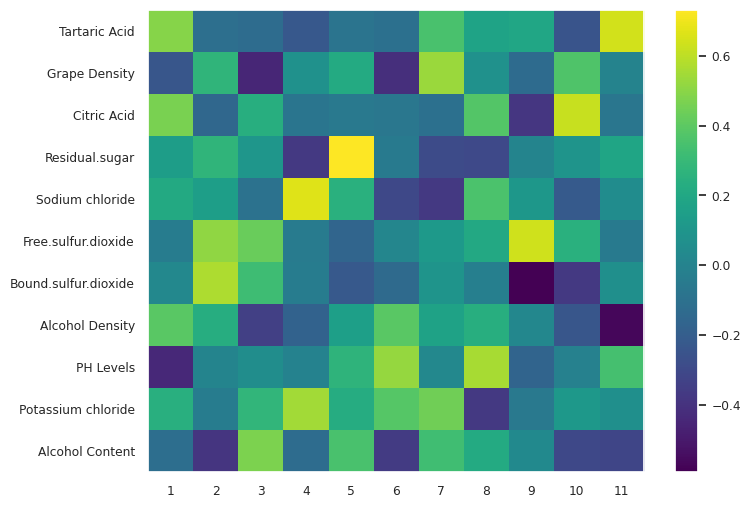

In [ ]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

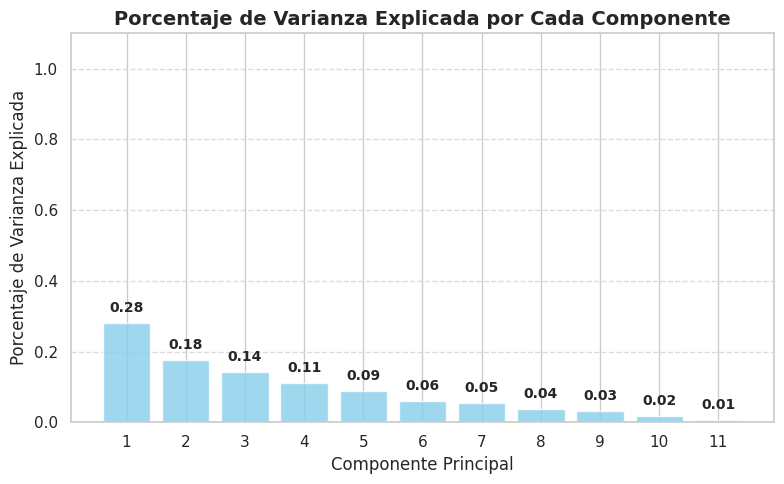

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

ax.bar(
    x=np.arange(modelo_pca.n_components_) + 1,
    height=modelo_pca.explained_variance_ratio_,
    color='skyblue',  # Color más suave
    alpha=0.8
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 8),
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de Varianza Explicada por Cada Componente', fontsize=14, fontweight='bold')
ax.set_xlabel('Componente Principal', fontsize=12)
ax.set_ylabel('Porcentaje de Varianza Explicada', fontsize=12)

ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

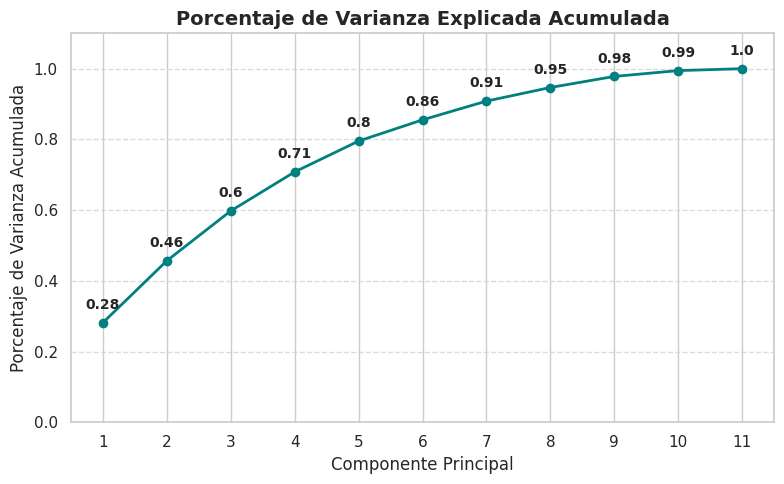

In [ ]:
sns.set(style='whitegrid')

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker='o',
    color='teal',
    linewidth=2,
    markersize=6
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(len(datos.columns)) + 1)
ax.set_xticklabels(np.arange(1, modelo_pca.n_components_ + 1))
ax.set_title('Porcentaje de Varianza Explicada Acumulada', fontsize=14, fontweight='bold')
ax.set_xlabel('Componente Principal', fontsize=12)
ax.set_ylabel('Porcentaje de Varianza Acumulada', fontsize=12)

ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

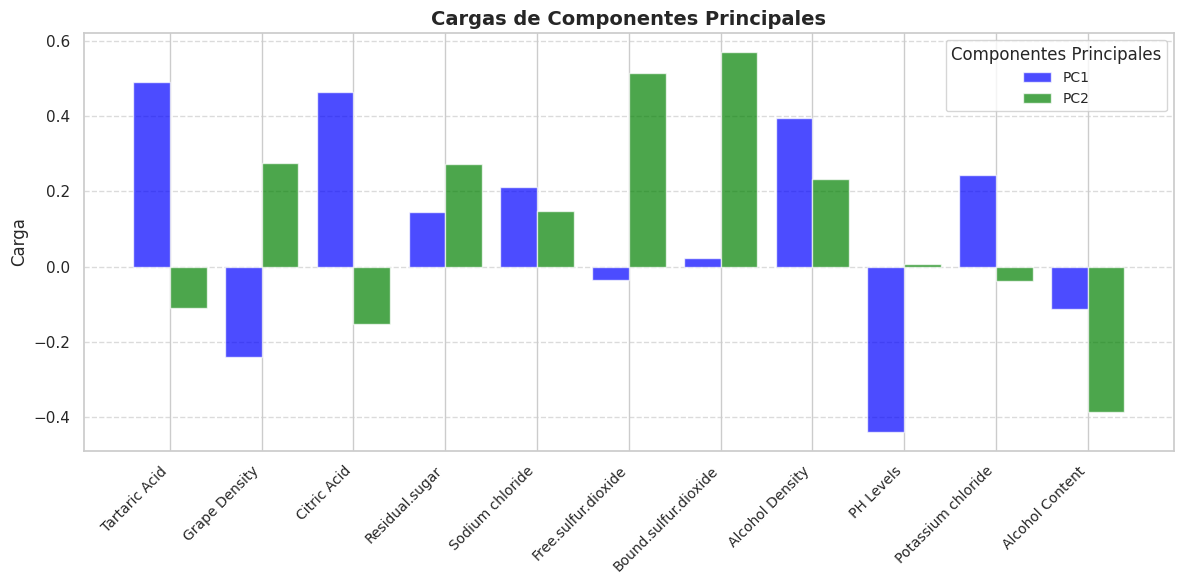

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de Seaborn
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))

# Graficar las cargas de PC1 y PC2
bar_width = 0.4  # Ancho de las barras
x = range(1, modelo_pca.n_components_ + 1)

# Graficar PC1
plt.bar([i - bar_width/2 for i in x], modelo_pca.components_[0],
        width=bar_width, color='blue', alpha=0.7, label='PC1')

# Graficar PC2
plt.bar([i + bar_width/2 for i in x], modelo_pca.components_[1],
        width=bar_width, color='green', alpha=0.7, label='PC2')

# Configuración de las etiquetas y el título
plt.xticks(x, datos.columns, rotation=45, ha='right', fontsize=10)
plt.title('Cargas de Componentes Principales', fontsize=14, fontweight='bold')
plt.ylabel('Carga', fontsize=12)
plt.legend(title='Componentes Principales', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de cuadrícula

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

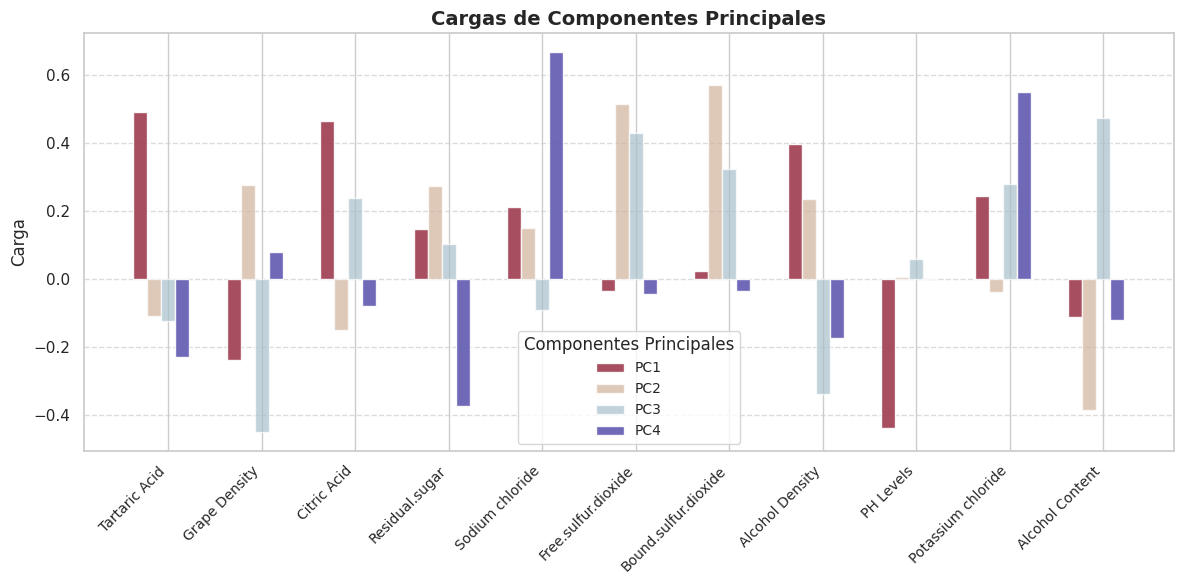

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Establecer el estilo de Seaborn
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))

# Graficar las cargas de PC1, PC2, PC3 y PC4
bar_width = 0.15  # Ancho de las barras
x = range(1, modelo_pca.n_components_ + 1)

# Obtener colores del colormap 'Blues'
cmap = cm.get_cmap('twilight_shifted')

# Graficar PC1
plt.bar([i - 2 * bar_width for i in x], modelo_pca.components_[0],
        width=bar_width, color=cmap(0.8), alpha=0.9, label='PC1')  # Color oscuro

# Graficar PC2
plt.bar([i - bar_width for i in x], modelo_pca.components_[1],
        width=bar_width, color=cmap(0.6), alpha=0.7, label='PC2')  # Color medio

# Graficar PC3
plt.bar(x, modelo_pca.components_[2],
        width=bar_width, color=cmap(0.4), alpha=0.7, label='PC3')  # Color medio

# Graficar PC4
plt.bar([i + bar_width for i in x], modelo_pca.components_[3],
        width=bar_width, color=cmap(0.2), alpha=0.9, label='PC4')  # Color claro

# Configuración de las etiquetas y el título
plt.xticks(x, datos.columns, rotation=45, ha='right', fontsize=10)
plt.title('Cargas de Componentes Principales', fontsize=14, fontweight='bold')
plt.ylabel('Carga', fontsize=12)
plt.legend(title='Componentes Principales', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de cuadrícula

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,0.913921,0.161043,0.282258,-0.005098,-0.267759,0.048630
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,-0.929714,1.009829,-0.762587,0.520707,0.062833,-0.138142
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,-0.401473,0.539553,-0.597946,0.086857,-0.187442,-0.118229
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,0.131017,-0.344290,0.455375,-0.091577,-0.130393,0.316714
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,0.913921,0.161043,0.282258,-0.005098,-0.267759,0.048630
